# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sambu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
api_key = "81d241f7ed0d4848804be81e47b6bb18"

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_data_frame = pd.DataFrame(bitcoin_sentiments) 

In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
ethereum_data_frame = pd.DataFrame(ethereum_sentiments)  

In [8]:
# Describe the Bitcoin Sentiment
bitcoin_data_frame.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.047564,0.066060,0.053250,0.88068
std,0.452871,0.070961,0.073677,0.09109
min,-0.908100,0.000000,0.000000,0.62800
25%,-0.296000,0.000000,0.000000,0.82225
50%,0.000000,0.058000,0.000000,0.88500
75%,0.362050,0.105250,0.102250,0.95250
max,0.924600,0.372000,0.307000,1.00000


In [9]:
# Describe the Ethereum Sentiment
ethereum_data_frame.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.124141,0.072040,0.044620,0.883360
std,0.448172,0.067952,0.068748,0.085455
min,-0.936600,0.000000,0.000000,0.646000
25%,-0.083700,0.000000,0.000000,0.821500
50%,0.115350,0.061000,0.000000,0.888500
75%,0.498075,0.118250,0.059000,0.943750
max,0.840200,0.249000,0.354000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitocin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()


# Create a list of stopwords
sw = set(stopwords.words('english'))



# Expand the default stopwords list if necessary
# N/A

In [12]:
def tokenizer(text):
    """Tokenizes text."""
    
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', text)  
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]   
    tokens = [word.lower() for word in lem if word.lower() not in sw]   
    
    # Remove the stopwords
    words = word_tokenize(re_clean)   

    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_data_frame['tokens'] = bitcoin_data_frame.text.apply(tokenizer)
bitcoin_data_frame.head()

,text,compound,positive,negative,neutral,tokens
0,It was 8:45 in the morning of June 13 when Bil...,0.5574,0.119,0.000,0.881,"[wa, 8:45, morning, june, 13, bill, stewart, ,..."
1,"Tools to trace cryptocurrencies have, over jus...",0.0000,0.000,0.000,1.000,"[tools, trace, cryptocurrencies, ,, last, seve..."
2,You gotta hand it to some people for being imp...,0.5994,0.130,0.034,0.835,"[got, ta, hand, people, impetuous, even, face,..."
3,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763,"[cryptocurrencies, often, criticized, bad, pla..."
4,Elon Musk-owned electric vehicle making compan...,0.2023,0.053,0.000,0.947,"[elon, musk-owned, electric, vehicle, making, ..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_data_frame["tokens"] = ethereum_data_frame.text.apply(tokenizer)
ethereum_data_frame.head()

,text,compound,positive,negative,neutral,tokens
0,Cryptocurrencies are often criticized for bein...,-0.5584,0.068,0.170,0.763,"[cryptocurrencies, often, criticized, bad, pla..."
1,The non-fungible token\r\n (NFT) market has fa...,-0.0217,0.048,0.051,0.901,"[non-fungible, token, (, nft, ), market, ha, f..."
2,"It's a day of the week ending in the letter ""y...",-0.2732,0.059,0.115,0.827,"['s, day, week, ending, letter, ``, ,, '', ine..."
3,"Less than two weeks into its soft launch, Game...",-0.1531,0.000,0.045,0.955,"[less, two, week, soft, launch, ,, gamestops, ..."
4,"The Ethereum Merge is significant, and not jus...",0.2023,0.048,0.000,0.952,"[ethereum, merge, significant, ,, people, cryp..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
N = 2
bgrams = ngrams(tokenizer(bitcoin_data_frame.text.str.cat()), n=2)
Counter(bgrams).most_common(10)

[(('char', ']'), 99),
 (('(', 'reuters'), 31),
 (('reuters', ')'), 31),
 ((')', '-'), 31),
 (('…', '['), 24),
 ((',', 'aug'), 10),
 (('inc', '('), 7),
 (('hard', 'drive'), 6),
 ((']', 'july'), 6),
 (('.', 'bitcoin'), 6)]

In [17]:
# Generate the Ethereum N-grams where N=2
N = 2
egrams = ngrams(tokenizer(ethereum_data_frame.text.str.cat()), n=2)
Counter(egrams).most_common(10)

[(('char', ']'), 97),
 (('…', '['), 12),
 (('%', ')'), 11),
 (('(', 'eth'), 9),
 (('(', 'reuters'), 7),
 (('reuters', ')'), 7),
 ((')', '-'), 7),
 ((']', 'happened'), 7),
 (('ethereum', '('), 7),
 ((']', 'ethereum'), 6)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_10 = tokenizer(bitcoin_data_frame.text.str.cat())
token_count(btc_top_10, N = 10)

[(',', 164),
 ('[', 100),
 (']', 100),
 ('char', 99),
 ('.', 81),
 ('bitcoin', 58),
 ('(', 48),
 (')', 48),
 ('-', 32),
 ('reuters', 31)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
eth_top_10 = tokenizer(ethereum_data_frame.text.str.cat())
token_count(eth_top_10, N = 10)

[(',', 176),
 ('.', 98),
 ('[', 97),
 ('char', 97),
 (']', 97),
 ('crypto', 35),
 ('(', 31),
 ('%', 30),
 (')', 29),
 ('ethereum', 29)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

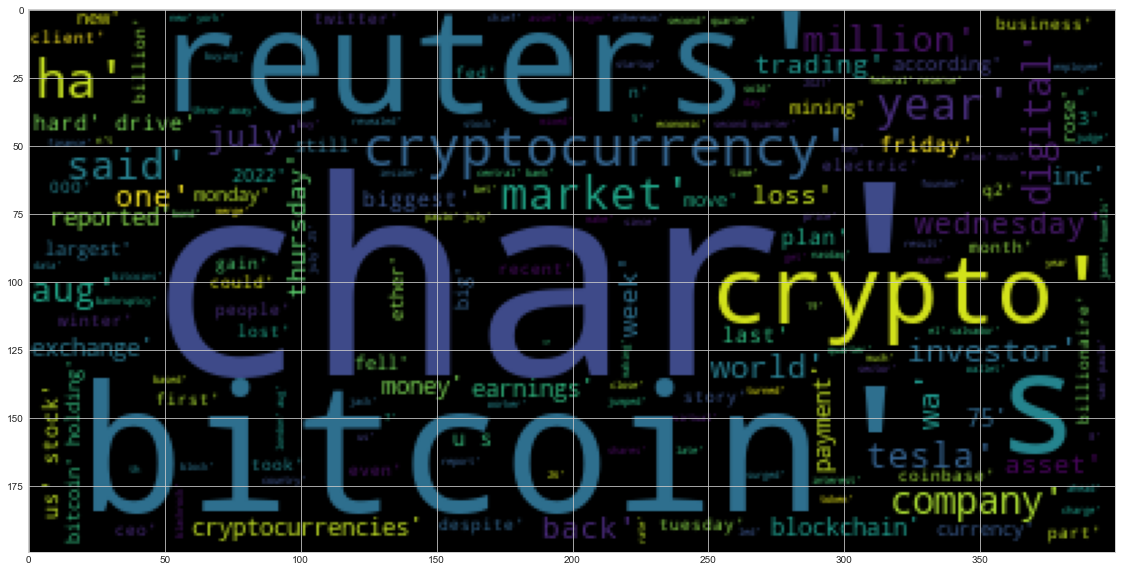

In [22]:
# Generate the Bitcoin word cloud
bitcoin_word_cloud = bitcoin_data_frame['tokens'].astype(str)
bword_cloud = WordCloud().generate(' '.join(bitcoin_word_cloud))
plt.imshow(bword_cloud)

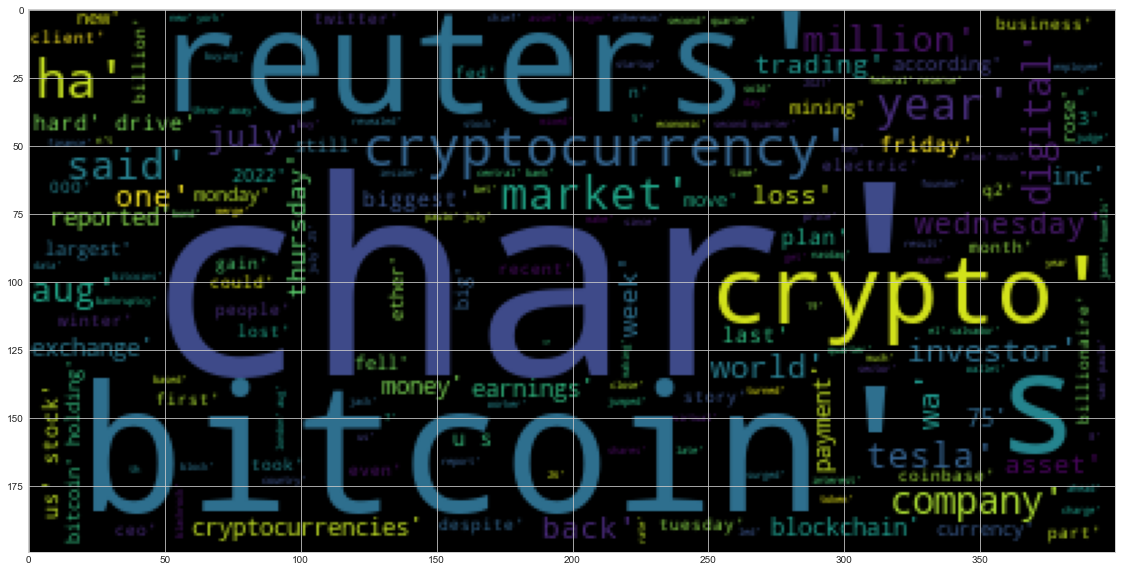

In [23]:
# Generate the Ethereum word cloud
ethereum_word_cloud = ethereum_data_frame['tokens'].astype(str)
eword_cloud = WordCloud().generate(' '.join(ethereum_word_cloud))
plt.imshow(bword_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
 #python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bitcoin_text = bitcoin_data_frame["text"].str.cat()

In [28]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_text)

# Add a title to the document
doc.user_data["title"]= "Bitocin! the future is now"

In [29]:
# Render the visualization
displacy.render(doc, style='ent')

In [30]:
# List all Entities
for i in doc.ents:
    print(i.text, i.label_)


8:45 in the morning TIME
June 13 DATE
Bill Stewart PERSON
Maine GPE
Dynamics Mining ORG
+3472 PERSON
the last several years DATE
millions CARDINAL
one CARDINAL
UK GPE
mans NORP
Every year DATE
Belgium GPE
the University of Cambridges Bitcoin Electricity Consump ORG
Tesla ORG
Bitcoin PERSON
Q2 LAW
Reuters ORG
6.85% PERCENT
22,717.05 MONEY
22:05 GMT TIME
Wednesday DATE
1,457.27 MONEY
29.1% PERCENT
weeks DATE
+17 PERSON
2021 DATE
Tesla ORG
$936 million MONEY
the second quarter of 2022 DATE
Bitcoin PERSON
75 CARDINAL
24,000 MONEY
first ORDINAL
August DATE
US GPE
this week DATE
as much as 4% PERCENT
24,191 MONEY
19 CARDINAL
Reuters ORG
Friday DATE
three-week DATE
2 CARDINAL
Reuters ORG
a good month DATE
months DATE
more than 17% PERCENT
July DATE
October DATE
Reuters ORG
3.36% PERCENT
24,584.24 MONEY
1707 DATE
GMT ORG
Saturday DATE
798.93 MONEY
39.7% PERCENT
the year DATE
2022 CARDINAL
Q2 earnings LAW
Wednesday DATE
Elon Musks ORG
$2.3 billion MONEY
second-quarter DATE
a record $3.3 billion

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
ethereum_text = ethereum_data_frame["text"].str.cat()

In [32]:
# Run the NER processor on all of the text
doc = nlp(ethereum_text)

# Add a title to the document
doc.user_data["title"]= "Ethereum, because its cheaper than bitcoin"

In [33]:
# Render the visualization
displacy.render(doc, style ='ent')

In [34]:
# List all Entities
for i in doc.ents:
    print(i.text, i.label_)


Every year DATE
Belgium GPE
the University of Cambridges Bitcoin Electricity Consump ORG
NFT ORG
Instagram ORG
May DATE
NF ORG
a day of the week ending in DATE
The Securities and Exchange Commission ORG
11 CARDINAL
GameStops ORG
NFT ORG
Ethereum Merge FAC
2014 DATE
Merge PERSON
second ORDINAL
Ethereum GPE
Vitalik Buterin PERSON
Thursday DATE
the Ethereum Community Conference ORG
Paris GPE
8 CARDINAL
Reuters ORG
Zipmex ORG
Ethereum PERSON
Bitcoin PERSON
this week DATE
Monday DATE
60% PERCENT
Vivaldi PERSON
Jon von Tetzchner PERSON
the last month DATE
Ethereum 2.0 FAC
second ORDINAL
US Treasury Department's ORG
Office of Foreign Asset Control ORG
Monday DATE
North Korean NORP
Ameri ORG
as much as 75% PERCENT
JPMorgan ORG
Monday DATE
36% PERCENT
102% PERCENT
mid-June DATE
Europe LOC
one CARDINAL
Mangnall PERSON
November 2021 DATE
Joe Hovde PERSON
New York GPE
Reuters ORG
3.36% PERCENT
24,584.24 MONEY
1707 DATE
GMT ORG
Saturday DATE
798.93 MONEY
39.7% PERCENT
the year DATE
Reuters ORG
6.85

---